In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
# Load the CSV file
data = pd.read_csv('boxes.csv')

# Display the first 5 rows of the file
data.head()

,BOX_ID,QUALITY,DELIVERY_OPTION,MILK,MEAT,UNIT_PRICE
0,1,Premium,Home Delivery - CoD,0.0,2.7,9.96
1,2,Premium,Home Delivery - CoD,0.0,2.3,11.96
2,3,Premium,Home Delivery - CoD,0.0,2.4,11.96
3,4,Premium,Home Delivery - CoD,0.0,2.5,11.96
4,5,Premium,Home Delivery - CoD,0.0,2.6,11.96


In [10]:
data.isnull()



,BOX_ID,QUALITY,DELIVERY_OPTION,MILK,MEAT,UNIT_PRICE
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
285,False,False,False,False,False,False
286,False,False,False,False,False,False
287,False,False,False,False,False,False
288,False,False,False,False,False,False


In [11]:
data.isnull().any()

BOX_ID             False
QUALITY            False
DELIVERY_OPTION    False
MILK               False
MEAT               False
UNIT_PRICE         False
dtype: bool

In [12]:
data.isnull().sum()

BOX_ID             0
QUALITY            0
DELIVERY_OPTION    0
MILK               0
MEAT               0
UNIT_PRICE         0
dtype: int64

In [13]:
#removes rows or columns with missing values
data_cleaned = data.dropna()
data.head()

,BOX_ID,QUALITY,DELIVERY_OPTION,MILK,MEAT,UNIT_PRICE
0,1,Premium,Home Delivery - CoD,0.0,2.7,9.96
1,2,Premium,Home Delivery - CoD,0.0,2.3,11.96
2,3,Premium,Home Delivery - CoD,0.0,2.4,11.96
3,4,Premium,Home Delivery - CoD,0.0,2.5,11.96
4,5,Premium,Home Delivery - CoD,0.0,2.6,11.96


In [14]:
# Remove duplicate rows
data_no_duplicates = data.drop_duplicates()

data.head()

,BOX_ID,QUALITY,DELIVERY_OPTION,MILK,MEAT,UNIT_PRICE
0,1,Premium,Home Delivery - CoD,0.0,2.7,9.96
1,2,Premium,Home Delivery - CoD,0.0,2.3,11.96
2,3,Premium,Home Delivery - CoD,0.0,2.4,11.96
3,4,Premium,Home Delivery - CoD,0.0,2.5,11.96
4,5,Premium,Home Delivery - CoD,0.0,2.6,11.96


In [15]:
data.nunique()

BOX_ID             290
QUALITY              2
DELIVERY_OPTION      3
MILK                28
MEAT                39
UNIT_PRICE          18
dtype: int64

In [16]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder

In [17]:
le = LabelEncoder()
data['QUALITY'] = le.fit_transform(data['QUALITY'])
data['DELIVERY_OPTION'] = le.fit_transform(data['DELIVERY_OPTION'])
data.head()

,BOX_ID,QUALITY,DELIVERY_OPTION,MILK,MEAT,UNIT_PRICE
0,1,0,1,0.0,2.7,9.96
1,2,0,1,0.0,2.3,11.96
2,3,0,1,0.0,2.4,11.96
3,4,0,1,0.0,2.5,11.96
4,5,0,1,0.0,2.6,11.96


In [18]:
correlation_matrix = data.corr()
print(correlation_matrix)

                   BOX_ID   QUALITY  DELIVERY_OPTION      MILK      MEAT  \
BOX_ID           1.000000  0.808425         0.064746  0.093779 -0.079066   
QUALITY          0.808425  1.000000         0.050854 -0.108958 -0.132106   
DELIVERY_OPTION  0.064746  0.050854         1.000000 -0.054415 -0.089667   
MILK             0.093779 -0.108958        -0.054415  1.000000 -0.456835   
MEAT            -0.079066 -0.132106        -0.089667 -0.456835  1.000000   
UNIT_PRICE       0.180626 -0.110991        -0.036490  0.607328  0.163739   

                 UNIT_PRICE  
BOX_ID             0.180626  
QUALITY           -0.110991  
DELIVERY_OPTION   -0.036490  
MILK               0.607328  
MEAT               0.163739  
UNIT_PRICE         1.000000  


In [19]:
import seaborn as sns

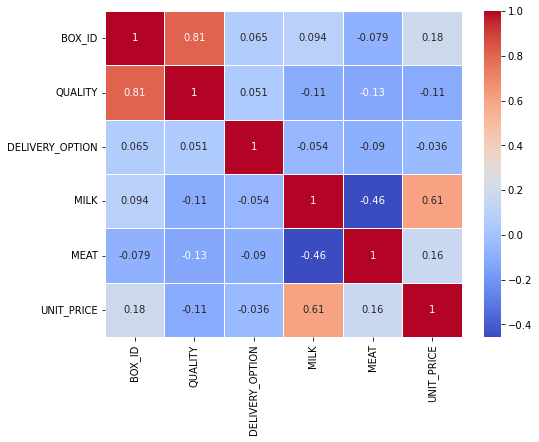

In [20]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

# Display the heatmap
plt.show()

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [22]:
features = ['QUALITY','DELIVERY_OPTION','MILK','MEAT']
X = data[features ]  # Use only the selected features
y = data['UNIT_PRICE']  

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [25]:
linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)
y_pred = linear_model.predict(X_test_scaled)

In [26]:
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
print(f"Linear Regression RMSE: {rmse}")

Linear Regression RMSE: 2.7722743625580355
